# R visualization for the 1854 London Cholera Outbreak

* ***1854 런던에서 콜레라가 창궐했을 때, Dr. John Snow 가 원인 분석과 조치후 결과를 보여주는 데이터 분석을 가시적으로 표현합니다.***

## Table of contents

1. [Background](#background)
2. [Install the R packages](#install)
3. [Visualize the rise of the outbreak](#rise)
4. [Plot deaths against sources of drinking water](#drinkingwater)
5. [Analyze the results of the action taken by Dr. Snow](#analyze)


## 1. Background<a id="background"></a>

In 1854, a deadly cholera outbreak occurred in the Soho district of London, England.  By the time the outbreak had ended, 616 people had died in just over a month.  The medical community at the time was divided about the causes of cholera.  Some believed that the illness was airborne, whereas Dr. John Snow believed that it was water borne. To prove his theory, Dr. Snow began collecting data about water sources, the number of deaths, the dates of these deaths, etc.  

In this analysis, we step into the good doctor's shoes and walk in his footsteps. We also prove the value in visualizing data, especially geospatial data which is so readily available today due to the advent of sensors and drones.

For more information, see:
- <a href="https://en.wikipedia.org/wiki/John_Snow" target="_blank" rel="noopener no referrer">Dr. John Snow</a>
- <a href="https://en.wikipedia.org/wiki/1854_Broad_Street_cholera_outbreak" target="_blank" rel="noopener no referrer">The 1854 London Cholera Outbreak</a>  

This analysis uses materials sourced from the "HistData" R package, which is available under a GPL license. For more information about the "HistData" package, see <a href="https://cran.r-project.org/web/packages/HistData/HistData.pdf" target="_blank" rel="noopener no referrer">here</a>.

## 2. Install the R packages

Install the following R packages for this analysis:
* [HistData](https://www.rdocumentation.org/packages/HistData/versions/0.8-2) : 통계 및 가시화 테스팅을 위한 작업 데이터들의 집합
* [Lubridate](https://www.rdocumentation.org/packages/lubridate/versions/1.7.4) : 날짜,시간 관련 처리를 보다 간편하게 지원
* [KernSmooth](https://www.rdocumentation.org/packages/KernSmooth/versions/2.23-15) : 커널스무딩 함수 지원
* [sp](https://www.rdocumentation.org/packages/sp/versions/1.2-7) : Spatial data 처리 지원 함수


In [7]:
install.packages("lubridate")
library(lubridate)
install.packages("HistData")
library(HistData)
install.packages("KernSmooth")
library(KernSmooth)
install.packages("sp")
library(sp)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
# 예제 - lubridate
ymd(20101215)
mdy("4/1/17")
bday <- dmy("14/10/1979")
month(bday)
wday(bday, label = TRUE)
year(bday) <- 2016
wday(bday, label = TRUE)

[1] "2010-12-15"

[1] "2017-04-01"

[1] 10

[1] Sun
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

[1] Fri
Levels: Sun < Mon < Tue < Wed < Thu < Fri < Sat

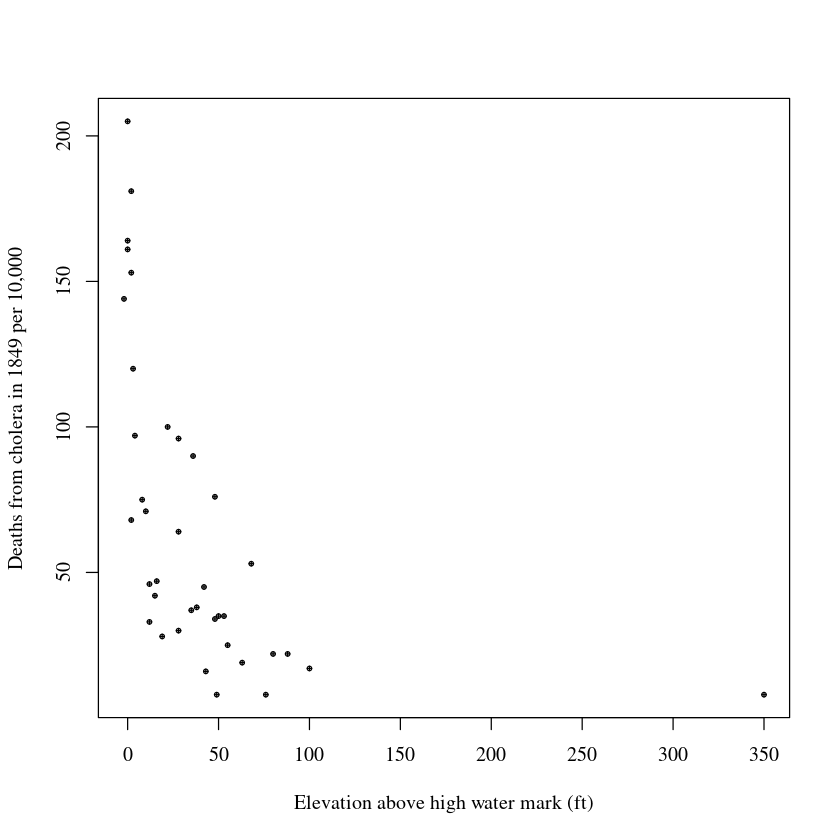

In [34]:
# 예제 - histdata
data(Cholera)
# plot cholera deaths vs. elevation
plot(cholera_drate ~ elevation, data=Cholera,
pch=10, cex.lab=1, cex=.5,
xlab="Elevation above high water mark (ft)",
ylab="Deaths from cholera in 1849 per 10,000")

## 3. Visualize the rise of the outbreak<a id="rise"></a>

We begin our analysis by visualizing the stunning rise in the number of deaths from cholera.  While people had begun dying in and around the Broad Street area around the 19th of August, the outbreak really began taking a heavy toll starting on 31 August 1854. Over the next 3 days, 127 people on or near Broad Street died. 

The heavy death toll continued over the next few days although the number of deaths on a daily basis started to reduce from its peak on 2 September 1854 (mostly driven by mass evacuations of people from the Broad Street area).  

We can plot the number of deaths during this time in the following chart:

* ***날짜 별로 사망자수를 그래프로 그려봄***

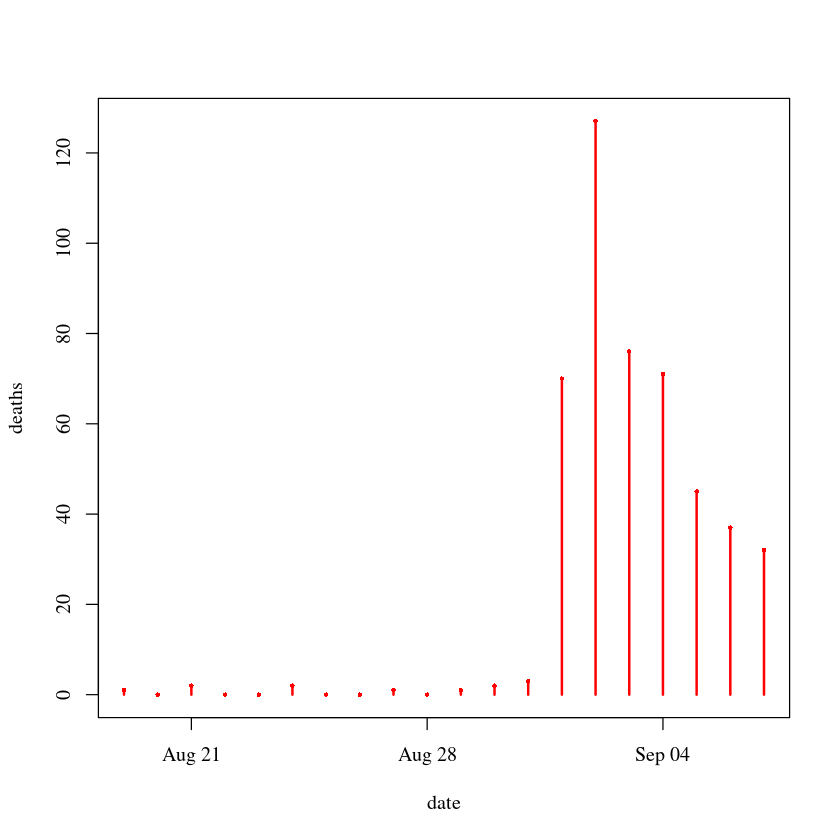

In [36]:
range <- Snow.dates[1:20,]
plot(deaths ~ date, data=range, type="h", lwd=2, col="red")
points(deaths ~ date, data=range, cex=0.5, pch=16, col="red")

## 4. Plot deaths against sources of drinking water<a id="drinkingwater"></a>

Based on John Snow's map and data, we plot the deaths against the location of the drinking water sources (wells), as follows:

* ***우물과 사망자의 위치 관계를 표현함***

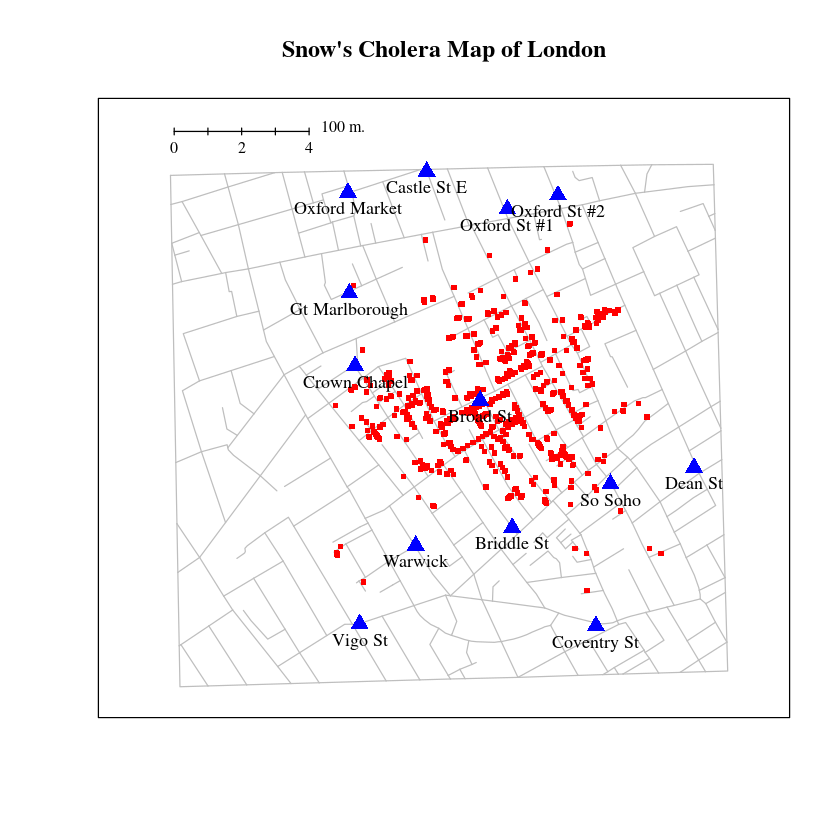

In [26]:
SnowMap()

In the chart above: 
- The <font color=blue>blue</font> triangles are the wells
- The <font color=red>red</font> dots show where people died  

The charts shows that many of the deaths occured in and around the Broad Street well.  
We can examine this more closely in the following chart which marks out the population areas that each of these wells serve:

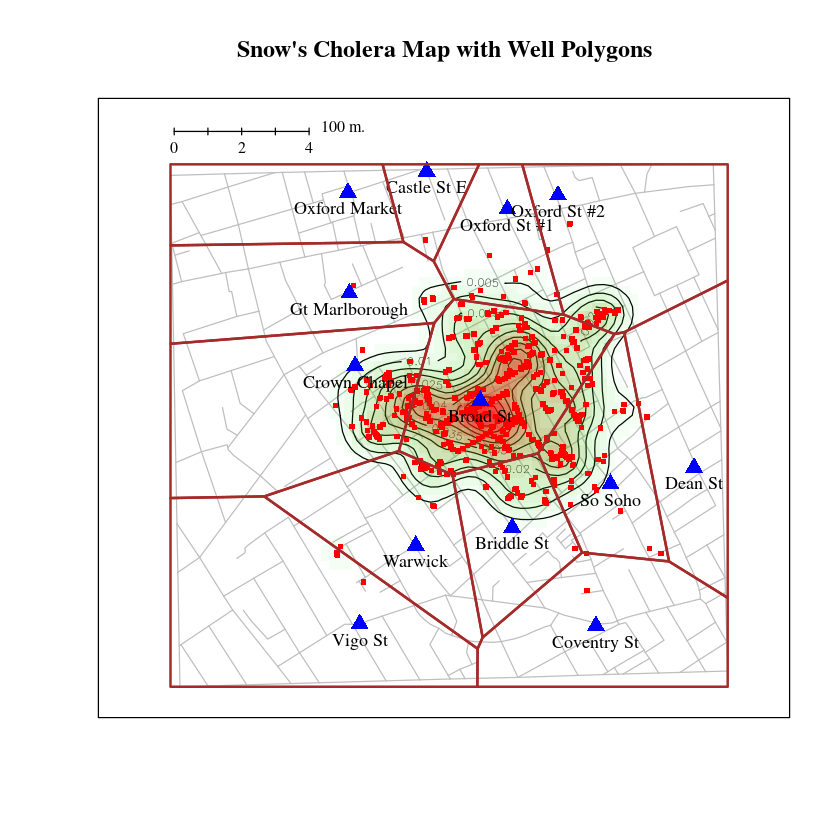

In [37]:
# add polygons
SnowMap(polygons=TRUE, main="Snow's Cholera Map with Well Polygons")

We can zoom into this chart and create a heat map to highlight the area around the Broad Street well:
* ***density를 붙여서 등고선 형태로 표현하고,  특정지역을 자세히 볼수 있도록 x,y limit를 설정함***

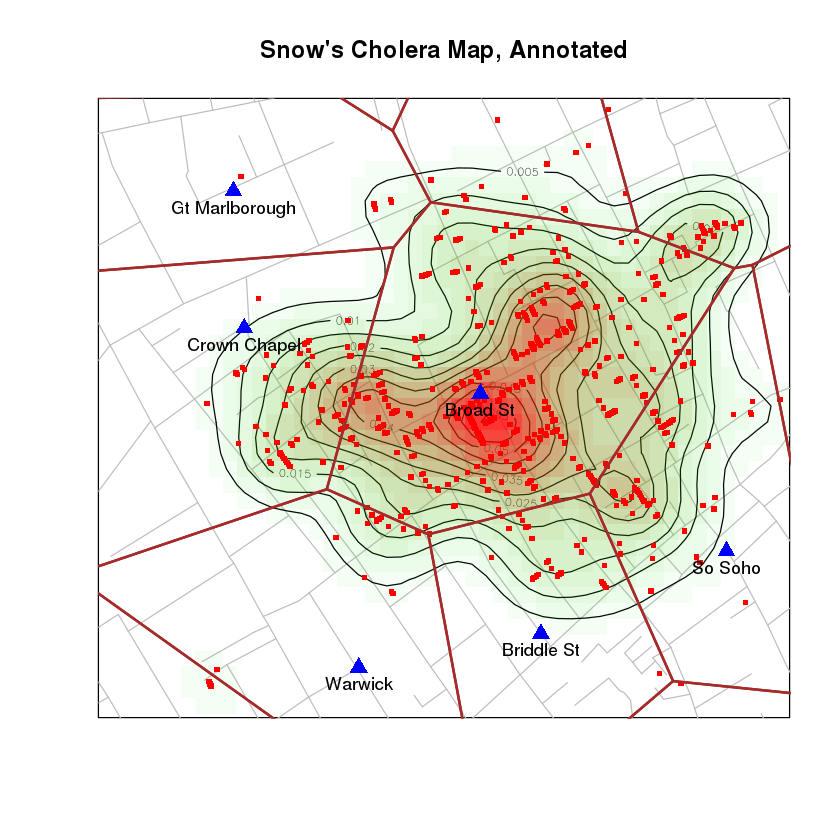

In [6]:
# zoom in a bit, and show density estimate
SnowMap(xlim=c(7.5,16.5), ylim=c(7,16), polygons=TRUE, density=TRUE,
main="Snow's Cholera Map, Annotated")

## 5. Analyze the results of the action taken by Dr. Snow<a id="analyze"></a>

Based on the analysis above, Dr. Snow hypothesized that the water from the Broad Street well was contaminated and was the prime cause for the spread of cholera.  

He was able to convince the local authorities to disable the Broad Street well by removing its handle. The well's handle was removed on 8 September 1854.

### 5. 1 Plot the number of deaths over time

To examine the results of the action taken by Dr. Snow and the local authorities, we plot the number of deaths over time again; but this time we include data after the well's handle was removed.
* ***Broad Street 의 우물을 폐쇠한 이후 변화를 관찰함***

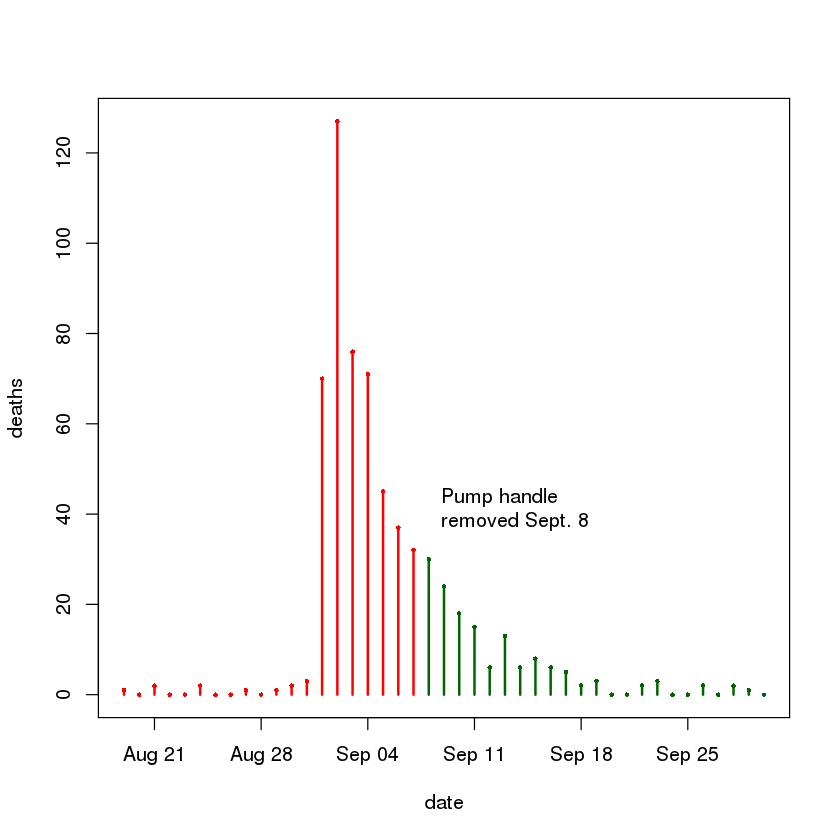

In [7]:
## Plot deaths over time
require(lubridate)
clr <- ifelse(Snow.dates$date < mdy("09/08/1854"), "red", "darkgreen")
plot(deaths ~ date, data=Snow.dates, type="h", lwd=2, col=clr)
points(deaths ~ date, data=Snow.dates, cex=0.5, pch=16, col=clr)
text( mdy("09/08/1854"), 40, "Pump handle\nremoved Sept. 8", pos=4)

As can be seen from the chart above, there was a remarkable reduction in the number of deaths from cholera after 8 September 1854 and the cholera outbreak eventually came to an end.  

In part because of his work in tracing the source of the cholera outbreak, Dr. John Snow is considered as one of the fathers of modern epidemiology, which is the study and analysis of patterns, causes and effects of health and disease conditions in defined populations[[1]](https://en.wikipedia.org/wiki/John_Snow).

### Citations

[1] Wikipedia contributors, <a href="https://en.wikipedia.org/w/index.php?title=John_Snow&oldid=805516722" target="_blank" rel="noopener no referrer">"John Snow," Wikipedia, The Free Encyclopedia</a>, (accessed November 22, 2017)


### Author
**Venky Rao** is an Executive IT Specialist at IBM. 

Copyright © IBM Corp. 2018. This notebook and its source code are released under the terms of the MIT License.